<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB6_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Розмірність даних: (1797, 64)
Кількість ознак: 64
Кількість об'єктів: 1797
Кількість унікальних значень цільової змінної: 10
Час виконання KMeans з параметром init='k-means++': 0.20550918579101562 сек
Adjusted Rand Index (ARI) для KMeans з параметром init='k-means++': 0.571249460729347
Adjusted Mutual Information (AMI) для KMeans з параметром init='k-means++': 0.6976433626172429
Час виконання KMeans з параметром init='random': 0.15076637268066406 сек
Adjusted Rand Index (ARI) для KMeans з параметром init='random': 0.5686427898186314
Adjusted Mutual Information (AMI) для KMeans з параметром init='random': 0.6931513851254525
Час виконання KMeans з параметром init від компонент PCA: 0.0688483715057373 сек


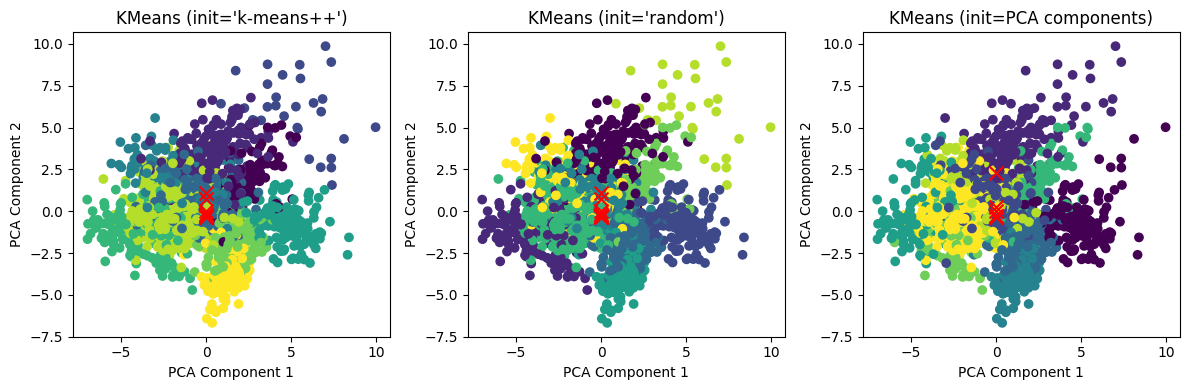

In [13]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import time
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних і масштабування ознак
digits = load_digits()
data_scaled = scale(digits.data)

# Виведення розмірності даних і кількості унікальних значень цільової змінної
print("Розмірність даних:", data_scaled.shape)
print("Кількість ознак:", data_scaled.shape[1])
print("Кількість об'єктів:", data_scaled.shape[0])
print("Кількість унікальних значень цільової змінної:", np.unique(digits.target).size)

# Застосування KMeans з параметрами init='k-means++', n_clusters та n_init
kmeans_pp = KMeans(init='k-means++', n_clusters=np.unique(digits.target).size, n_init=10)
start_time = time.time()
kmeans_pp.fit(data_scaled)
end_time = time.time()
print("Час виконання KMeans з параметром init='k-means++':", end_time - start_time, "сек")

# Порахунок метрик ARI та AMI
ari_pp = adjusted_rand_score(digits.target, kmeans_pp.labels_)
ami_pp = adjusted_mutual_info_score(digits.target, kmeans_pp.labels_)
print("Adjusted Rand Index (ARI) для KMeans з параметром init='k-means++':", ari_pp)
print("Adjusted Mutual Information (AMI) для KMeans з параметром init='k-means++':", ami_pp)

# Аналогічно виконуємо для KMeans з параметром init='random'
kmeans_random = KMeans(init='random', n_clusters=np.unique(digits.target).size, n_init=10)
start_time = time.time()
kmeans_random.fit(data_scaled)
end_time = time.time()
print("Час виконання KMeans з параметром init='random':", end_time - start_time, "сек")

# Порівняння часу та метрик для двох підходів
ari_random = adjusted_rand_score(digits.target, kmeans_random.labels_)
ami_random = adjusted_mutual_info_score(digits.target, kmeans_random.labels_)
print("Adjusted Rand Index (ARI) для KMeans з параметром init='random':", ari_random)
print("Adjusted Mutual Information (AMI) для KMeans з параметром init='random':", ami_random)

# Застосування методу PCA
pca = PCA(n_components=np.unique(digits.target).size)
data_pca = pca.fit_transform(data_scaled)

# Створення моделі KMeans на основі компонент PCA
kmeans_pca = KMeans(init=pca.components_, n_clusters=np.unique(digits.target).size, n_init=1)
start_time = time.time()
kmeans_pca.fit(data_scaled)
end_time = time.time()
print("Час виконання KMeans з параметром init від компонент PCA:", end_time - start_time, "сек")

# Відображення даних на 2D площині та центрів кластерів
plt.figure(figsize=(12, 4))

# Для KMeans з параметром init='k-means++'
plt.subplot(131)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pp.labels_, cmap='viridis')
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title("KMeans (init='k-means++')")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Для KMeans з параметром init='random'
plt.subplot(132)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_random.labels_, cmap='viridis')
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title("KMeans (init='random')")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Для KMeans з параметром init від компонент PCA
plt.subplot(133)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title("KMeans (init=PCA components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


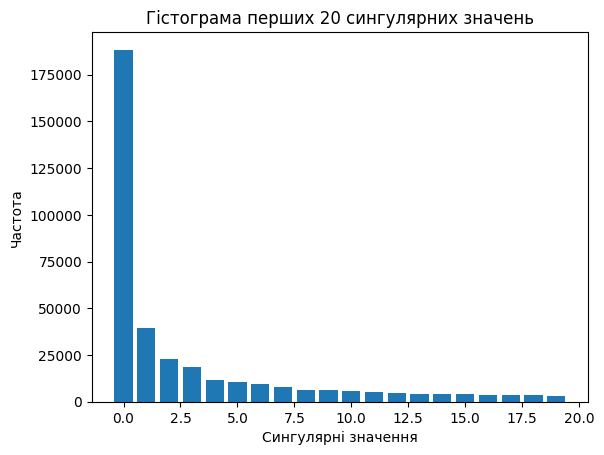

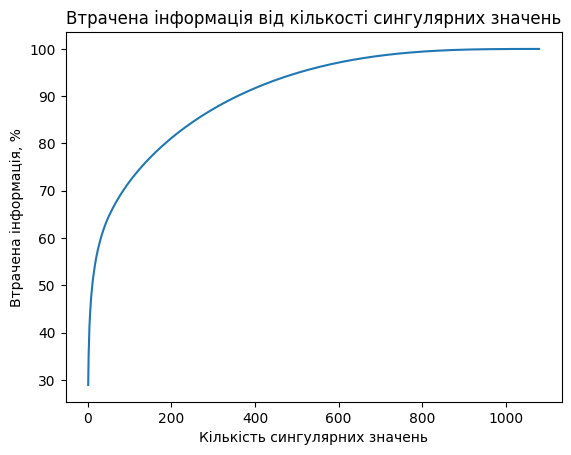

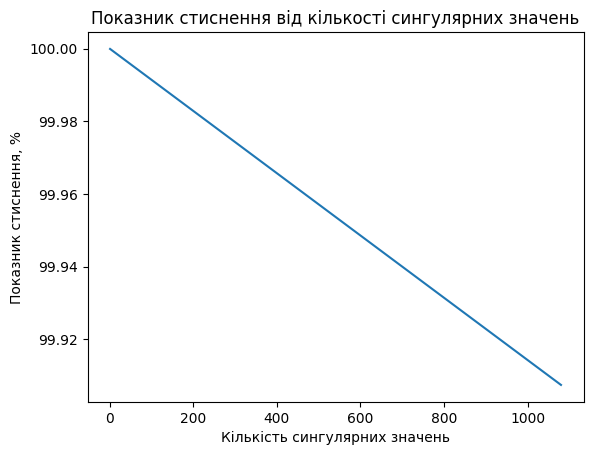

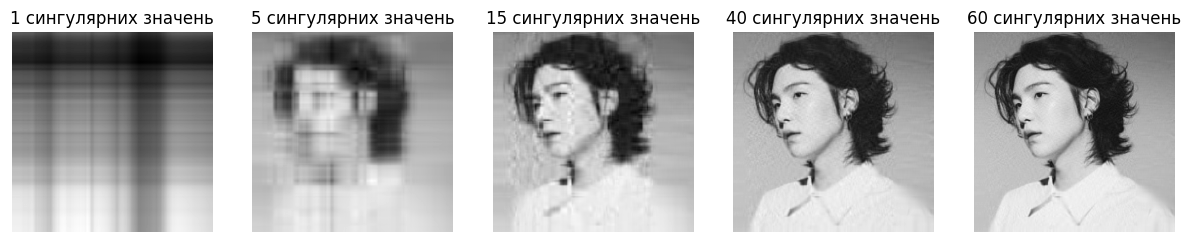

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Завантаження зображення
image = Image.open('yoongi.jfif')
image = image.convert('L')

# Перетворення зображення в матрицю
image_matrix = np.array(image)

# Розкладання матриці SVD
U, S, Vt = np.linalg.svd(image_matrix)

# Побудова гістограми перших 20 сингулярних значень
plt.bar(range(20), S[:20])
plt.title('Гістограма перших 20 сингулярних значень')
plt.xlabel('Сингулярні значення')
plt.ylabel('Частота')
plt.show()

# Розрахунок втраченої інформації за умови використання лише 1, 2, 3, ..., N сингулярних значень
total_information = np.sum(S)
information_percentage = [np.sum(S[:n]) / total_information * 100 for n in range(1, len(S) + 1)]

# Графічне побудування залежності втраченої інформації від кількості сингулярних значень
plt.plot(range(1, len(S) + 1), information_percentage)
plt.title('Втрачена інформація від кількості сингулярних значень')
plt.xlabel('Кількість сингулярних значень')
plt.ylabel('Втрачена інформація, %')
plt.show()

# Розрахунок показника стиснення
compression_ratio = [(image_matrix.size - n) / image_matrix.size * 100 for n in range(1, len(S) + 1)]

# Графічне побудування залежності показника стиснення від кількості сингулярних значень
plt.plot(range(1, len(S) + 1), compression_ratio)
plt.title('Показник стиснення від кількості сингулярних значень')
plt.xlabel('Кількість сингулярних значень')
plt.ylabel('Показник стиснення, %')
plt.show()

# Відтворення зображення для 1, 5, 15, ... сингулярних значень
selected_singular_values = [1, 5, 15, 40, 60]
reconstructed_images = []
for n in selected_singular_values:
    reconstructed_image = np.dot(U[:, :n], np.dot(np.diag(S[:n]), Vt[:n, :]))
    reconstructed_images.append(reconstructed_image)

# Відображення відтворених зображень
fig, axes = plt.subplots(1, len(selected_singular_values), figsize=(15, 5))
for i in range(len(selected_singular_values)):
    axes[i].imshow(reconstructed_images[i], cmap='gray')
    axes[i].set_title(f'{selected_singular_values[i]} сингулярних значень')
    axes[i].axis('off')
plt.show()
